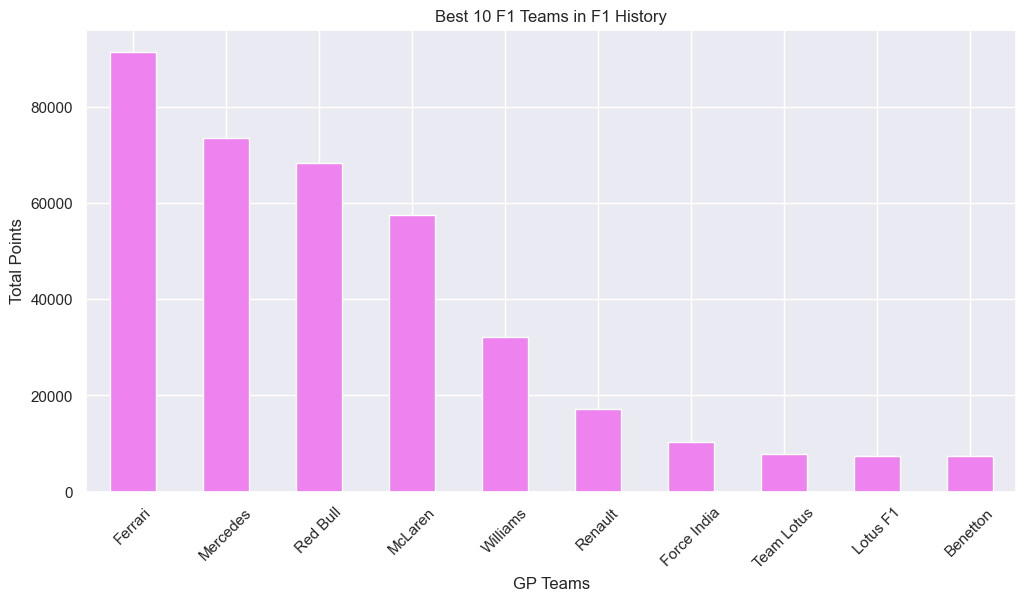

C:\Users\Pavan T S\AppData\Local\Temp\ipykernel_18772\3083699699.py:144: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




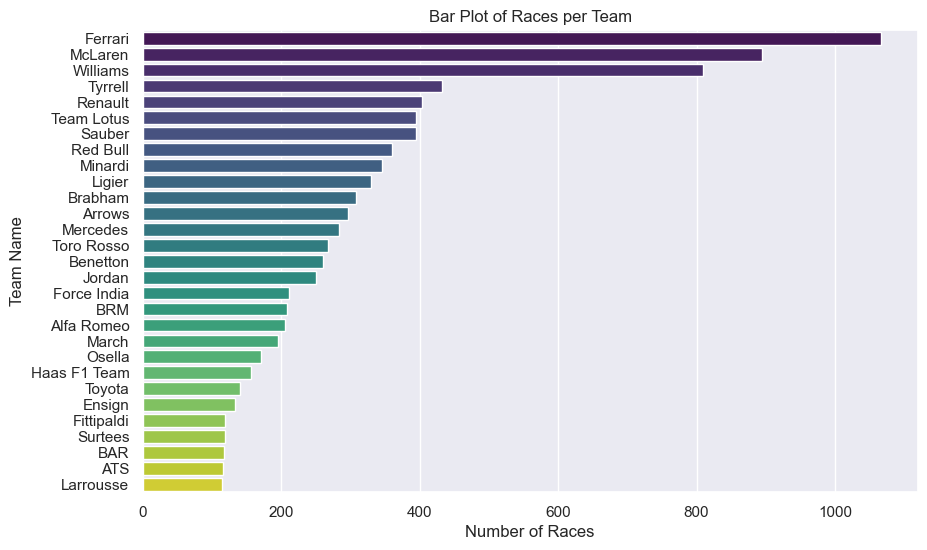

   driver_name driver_nationality  age
 Oscar Piastri         Australian 23.0
Logan Sargeant           American 24.0
  Yuki Tsunoda           Japanese 24.0
  Lando Norris            British 25.0
   Guanyu Zhou            Chinese 25.0
Average age of drivers racing in 2023: 22.04243668720055


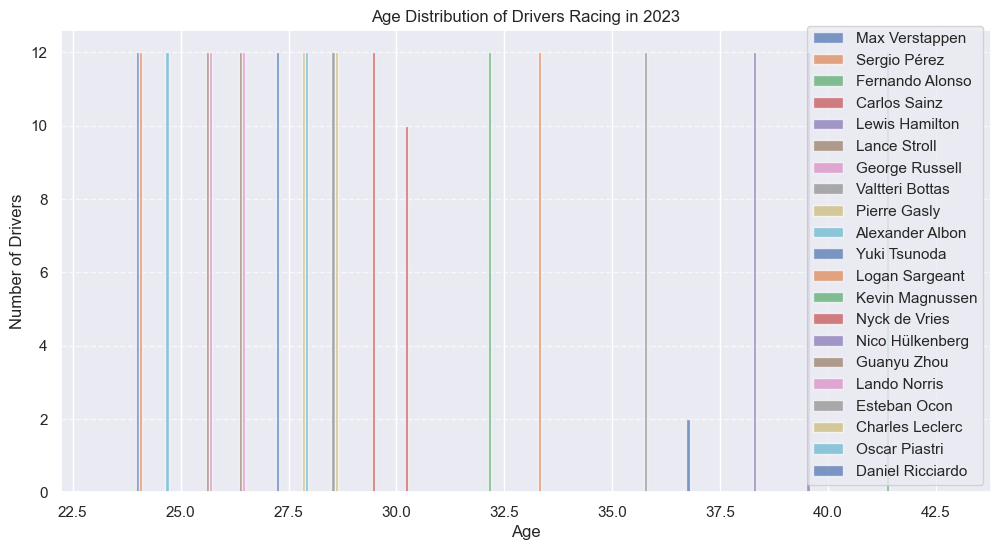

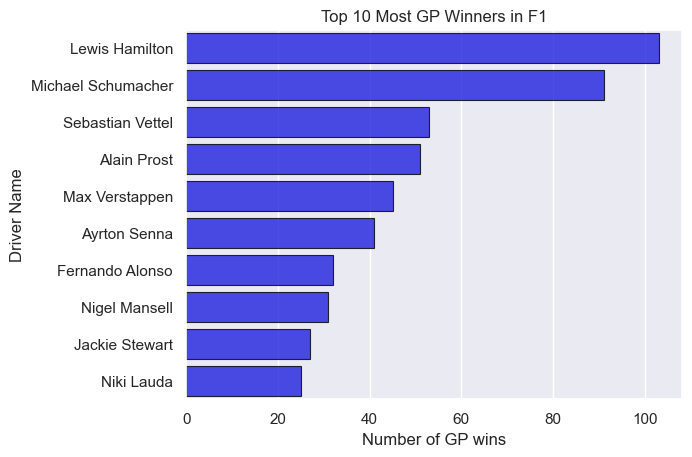

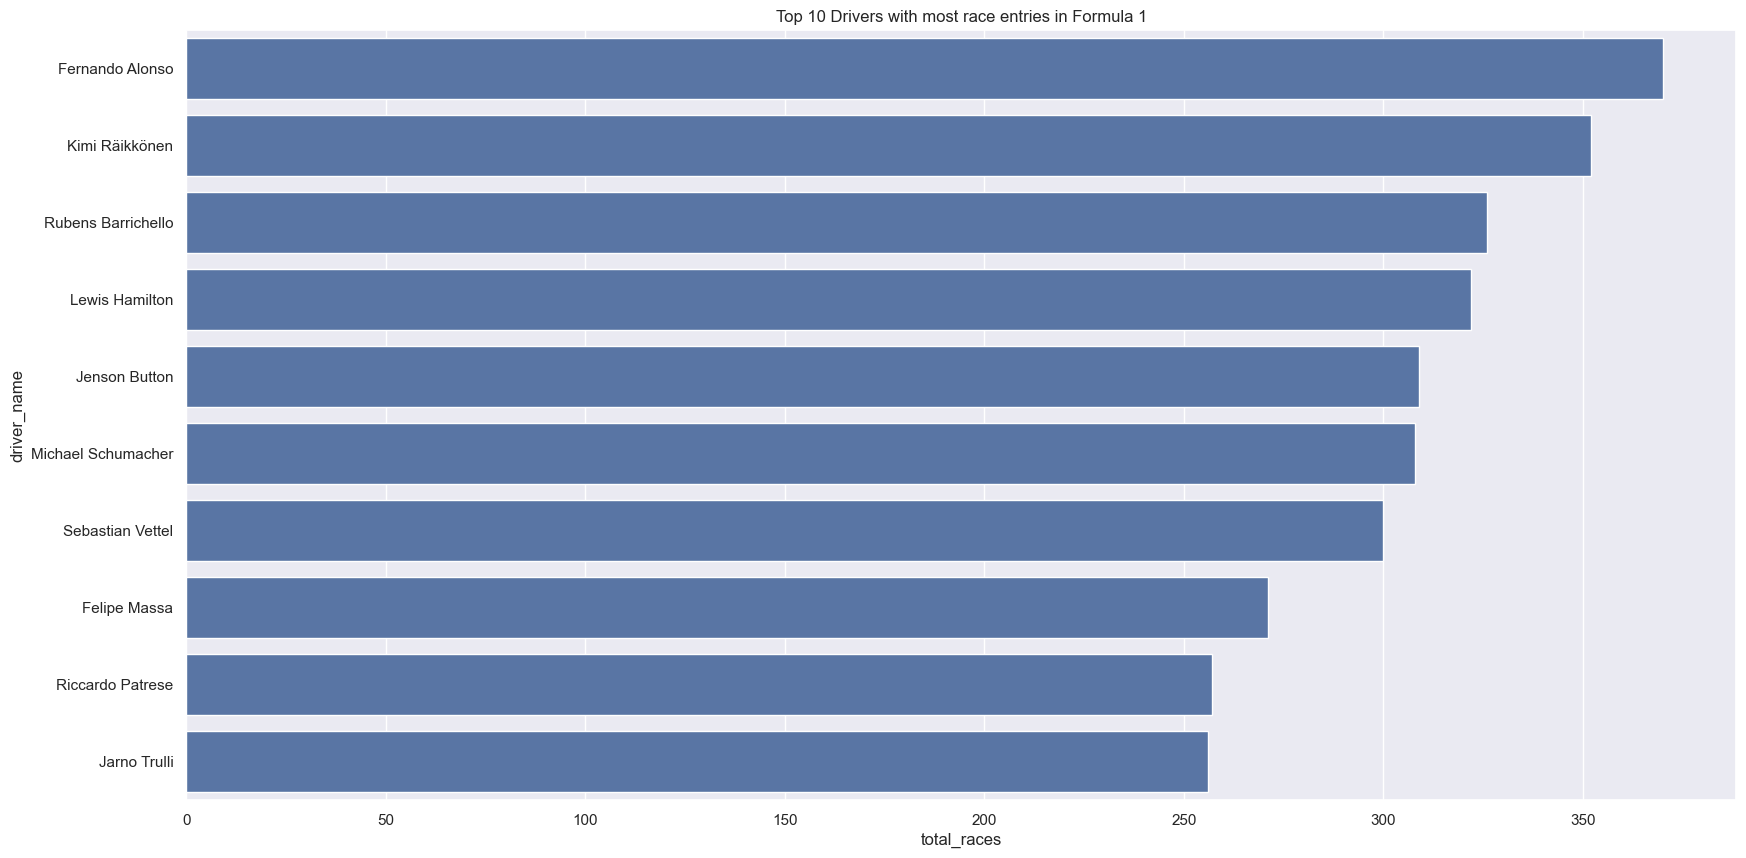

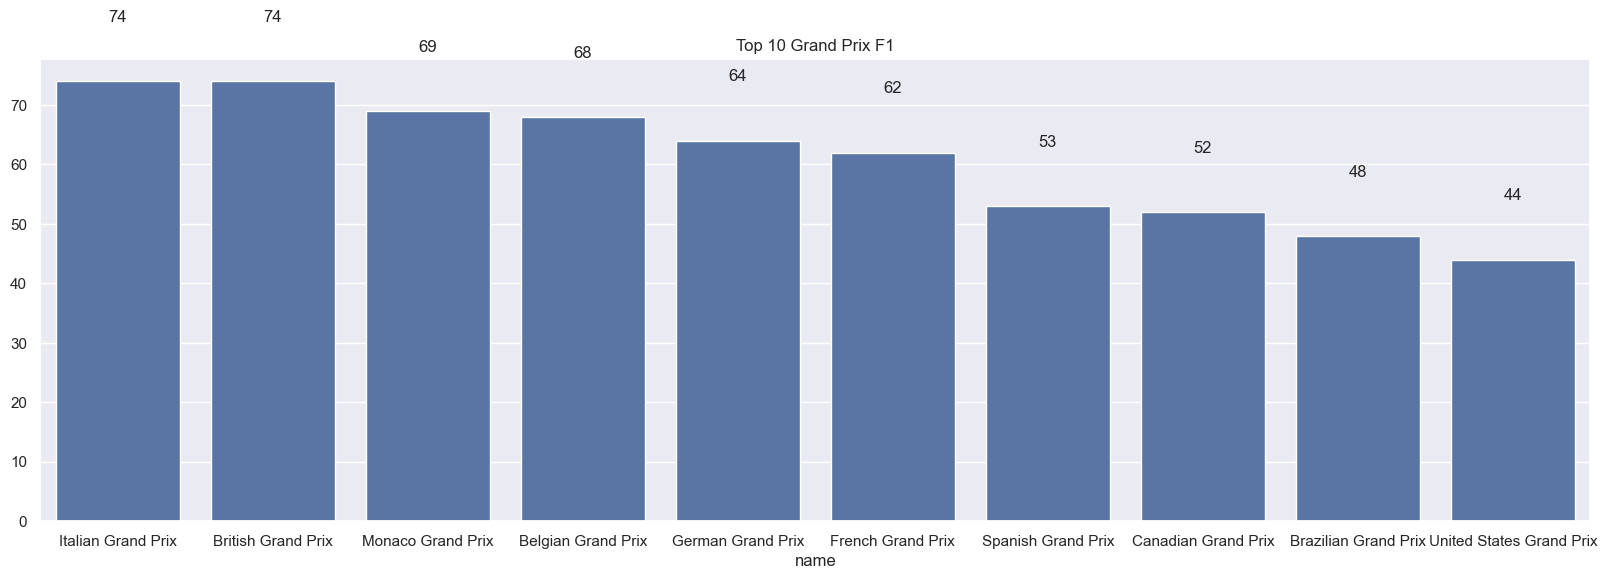

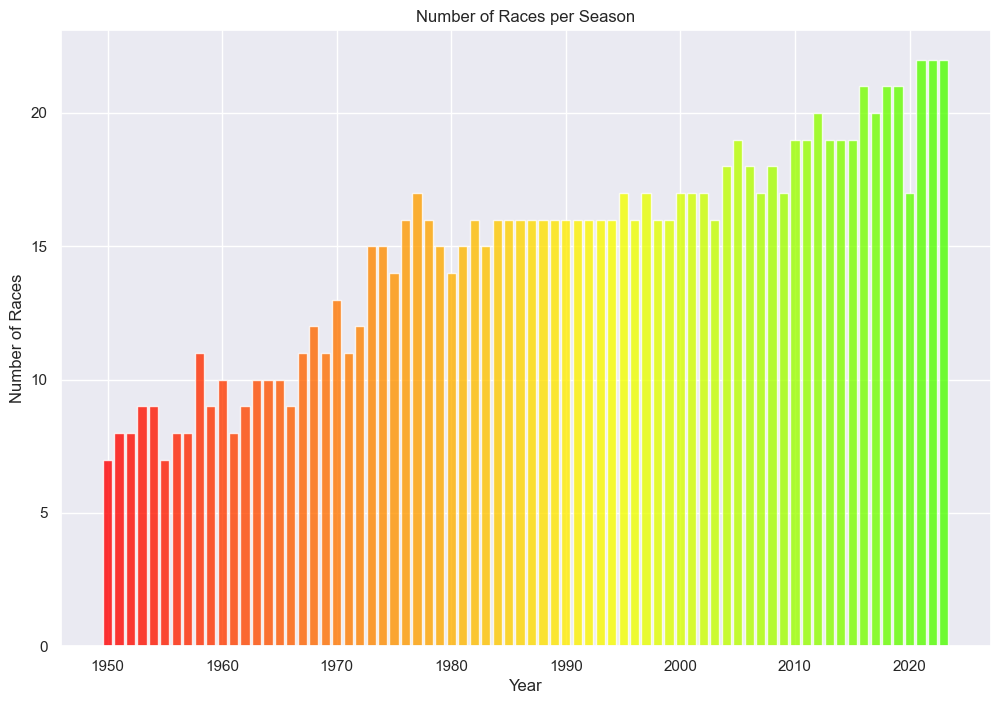

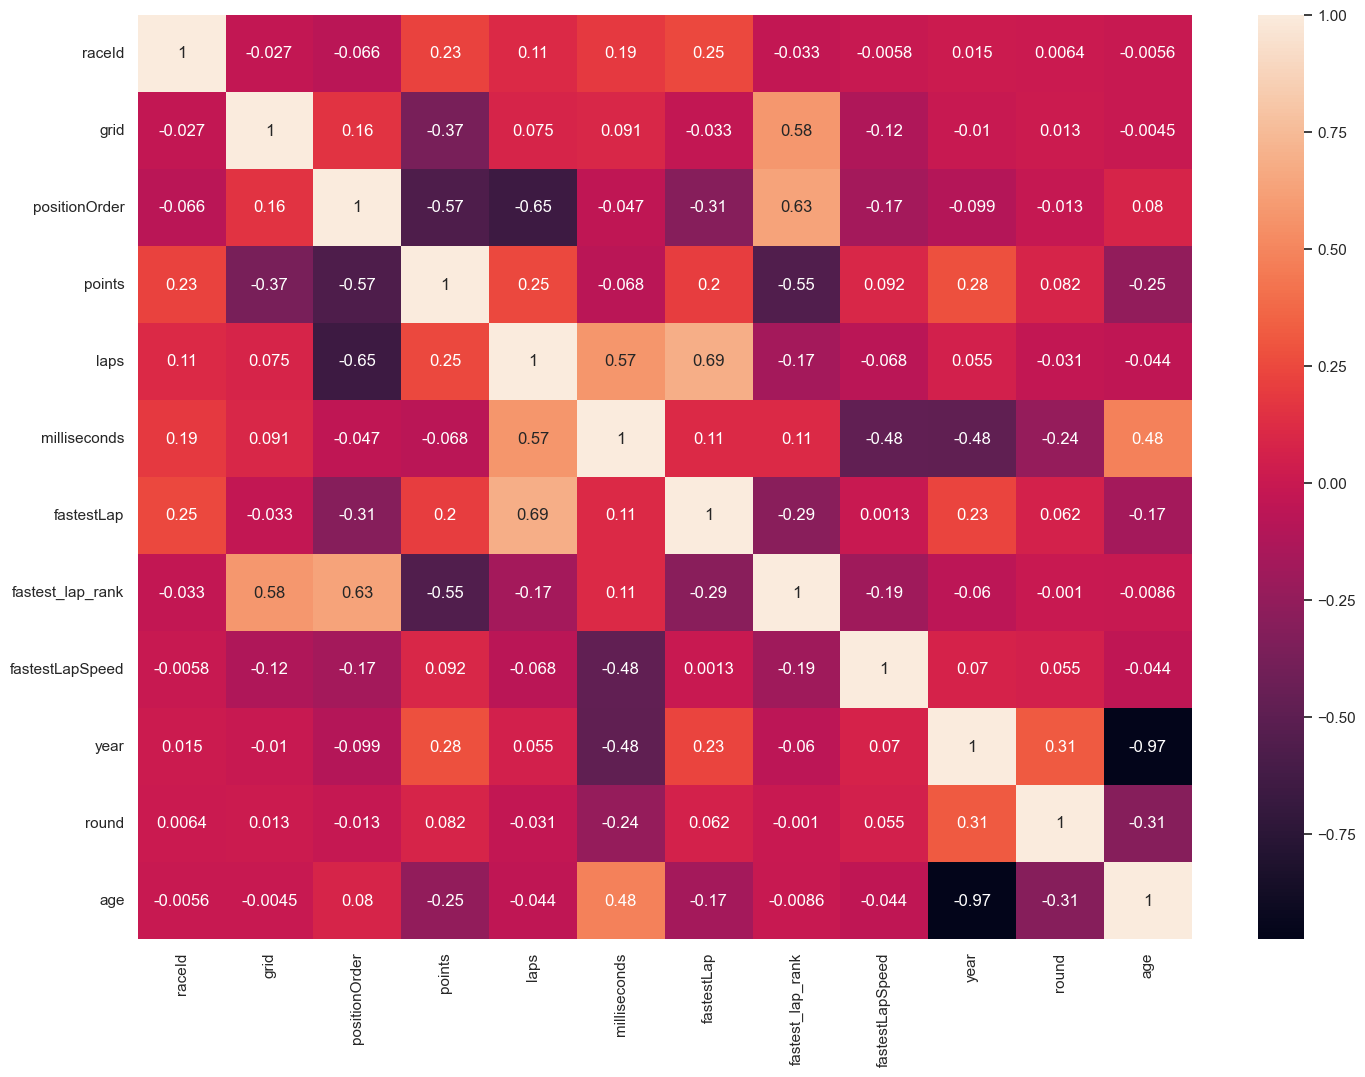

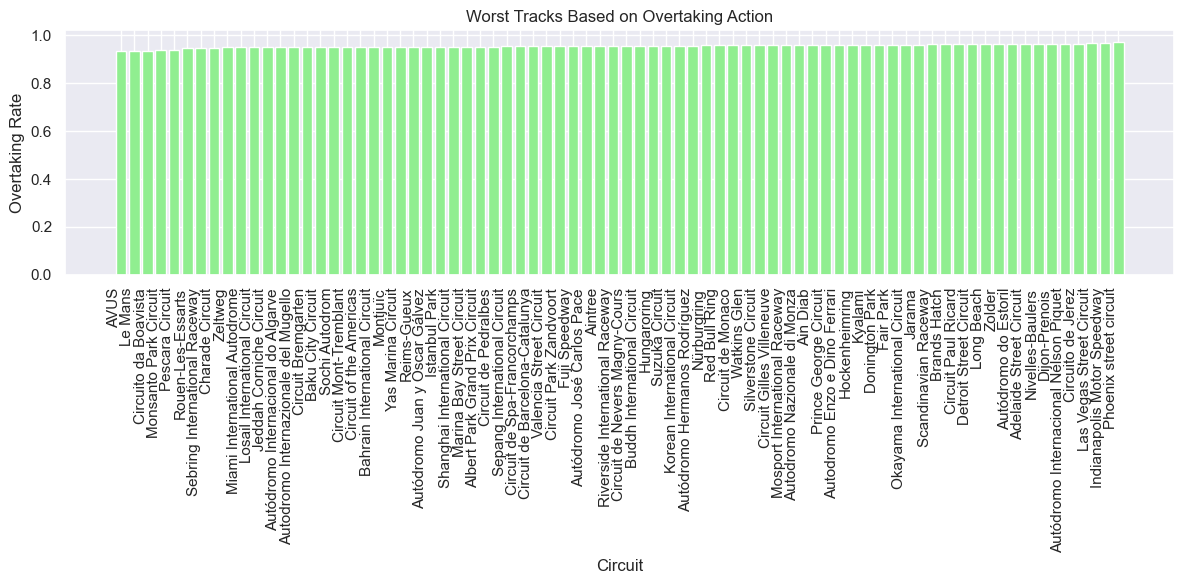

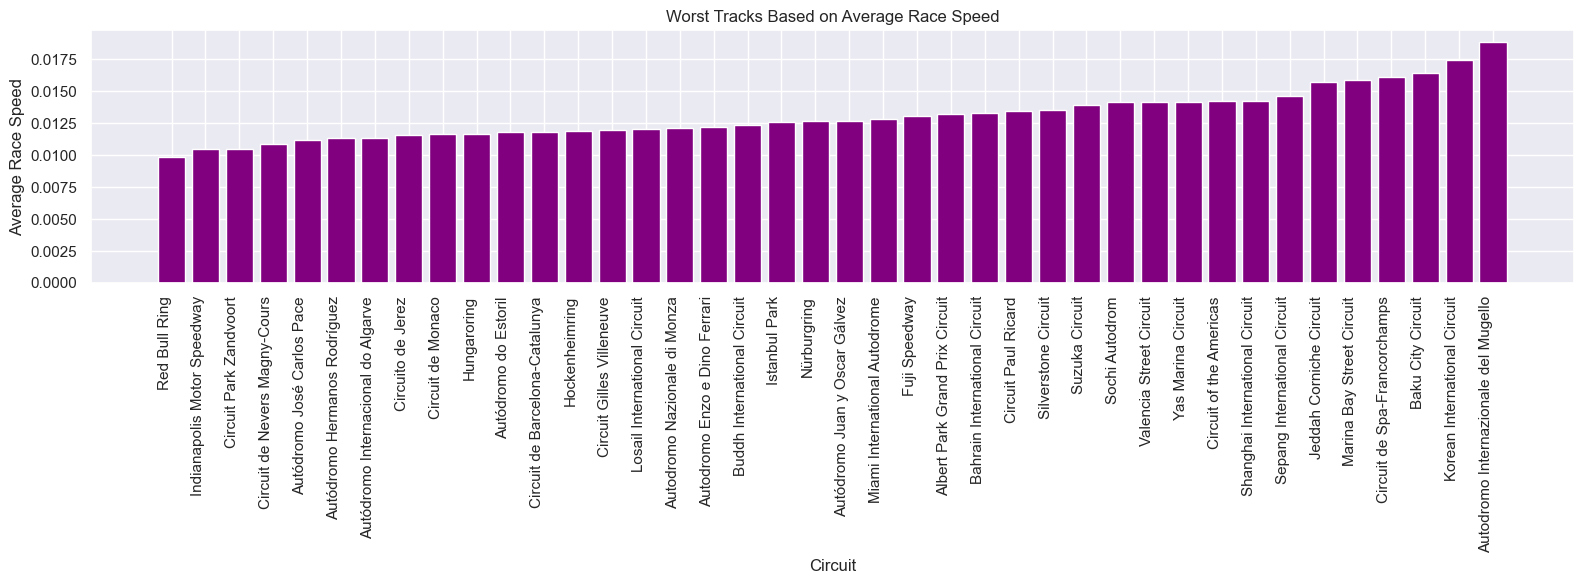

<Figure size 1600x600 with 0 Axes>

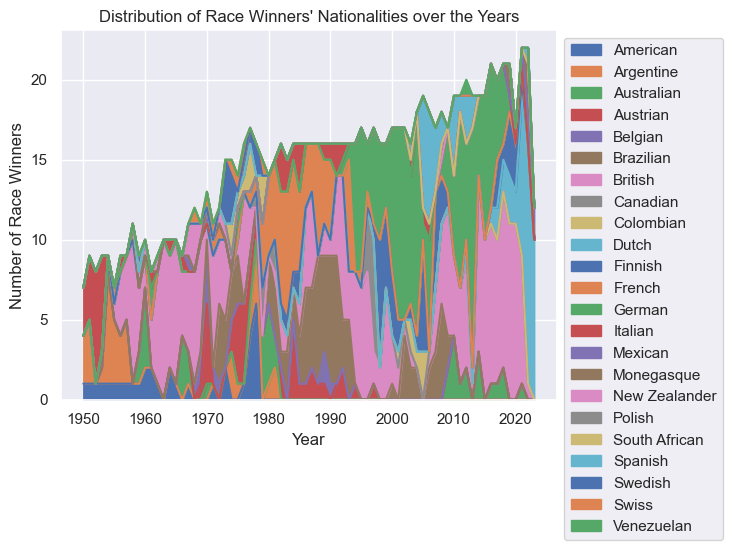

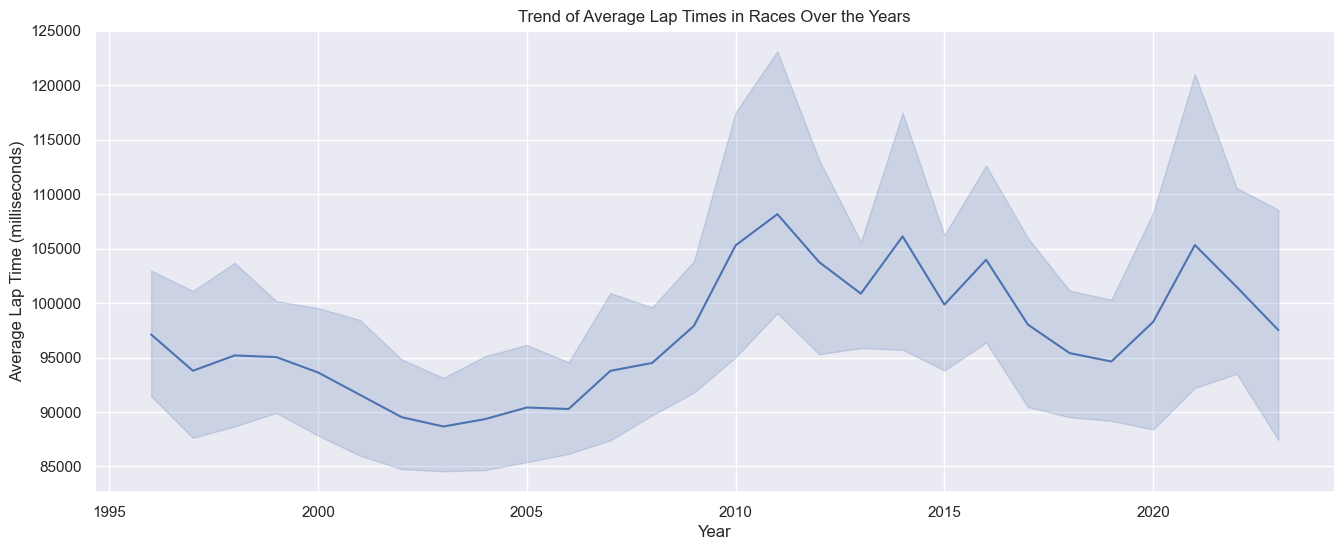

Potential Championship Contender: Max Verstappen
     Predicted Value:  Actual Value:
0                  19             17
1                   1              1
2                   1              2
3                   6              6
4                  10             10
..                ...            ...
127                11             19
128                19             14
129                18             11
130                19             16
131                 5              5

[132 rows x 2 columns]


In [7]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

circuits = pd.read_csv('C:/Users/Pavan T S/Downloads/F1/circuits.csv')
laptimes = pd.read_csv('C:/Users/Pavan T S/Downloads/F1/lap_times.csv')
pitstops = pd.read_csv('C:/Users/Pavan T S/Downloads/F1/pit_stops.csv')
seasons = pd.read_csv('C:/Users/Pavan T S/Downloads/F1/seasons.csv')
status = pd.read_csv('C:/Users/Pavan T S/Downloads/F1/status.csv')
constructor_standings = pd.read_csv('C:/Users/Pavan T S/Downloads/F1/constructor_standings.csv')
constructors = pd.read_csv('C:/Users/Pavan T S/Downloads/F1/constructors.csv')
driver_standings = pd.read_csv('C:/Users/Pavan T S/Downloads/F1/driver_standings.csv')
drivers = pd.read_csv('C:/Users/Pavan T S/Downloads/F1/drivers.csv')
races = pd.read_csv('C:/Users/Pavan T S/Downloads/F1/races.csv')
constructor_results = pd.read_csv('C:/Users/Pavan T S/Downloads/F1/constructor_results.csv')
results = pd.read_csv('C:/Users/Pavan T S/Downloads/F1/results.csv')
qualifying = pd.read_csv('C:/Users/Pavan T S/Downloads/F1/qualifying.csv')

pd.get_option("display.max_columns", None)

drivers.head()

races.head()

driver_standings.head()

circuits.isnull().sum()
circuits['circuitId'].dtype
circuits.dtypes

laptimes.head()

pitstops.head()

seasons.head()

status.head()

constructor_standings.head()

constructors.head()

driver_standings.head()

drivers.head()

races.head()

constructor_results.head()

qualifying.head()

# Here I selected some CSV files to use. Since I will make a championship prediction, I found the results, stats, drivers, races, constructor, and driver_standings files appropriate for use.
races

results

# We can see that the URL part is unnecessary here, so we will drop it later.
constructors

drivers

status

driver_standings

# When merging, I determined which ones to use and how to sort them in the table within the dataframe.

df = pd.merge(results, races[['raceId', 'year', 'name', 'round', 'date']], on='raceId', how='left')
df = pd.merge(df, drivers[['driverId', 'driverRef', 'forename', 'surname', 'nationality', 'dob']], on='driverId',
              how='left')
df = pd.merge(df, constructors[['constructorId', 'name', 'nationality']], on='constructorId', how='left')
df = pd.merge(df, status[['statusId', 'status']], on='statusId', how='left')

# Writing this line to see all columns
pd.get_option("display.max_columns", None)
df

# We removed unnecessary columns
df.drop(['number', 'position', 'positionText', 'statusId', 'resultId', 'driverId', 'constructorId'], axis=1,
        inplace=True)

df

df.rename(columns={'rank': 'fastest_lap_rank', 'name_x': 'gp_name', 'nationality_x': 'driver_nationality',
                   'name_y': 'constructor_name', 'nationality_y': 'constructor_nationality', 'driverRef': 'driver'},
          inplace=True)
df

df['driver_name'] = df['forename'] + ' ' + df['surname']
df.drop(['forename', 'surname'], axis=1, inplace=True)

df

df.head()

# Converted string structure to date format
pd.to_datetime(df.dob)

df['dob'] = pd.to_datetime(df['dob'])

from datetime import datetime

dates = datetime.today() - df['dob']
age = dates.dt.days / 365

# To be able to draw a graph by age later, I made some calculations to get the age distribution of the drivers according to the current date, and created a new column named 'age' under it.
df['age'] = round(age)

df

# **TOP 10 MOST SUCCESSFUL TEAMS IN F1 HISTORY**
# %%

top_constructors = pd.merge(constructor_standings, constructors, on='constructorId')
top_constructors = top_constructors.groupby('name')['points'].sum()
top_constructors = top_constructors.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_constructors.plot(kind='bar', color='violet')
plt.xlabel('GP Teams')
plt.ylabel('Total Points')
plt.title('Best 10 F1 Teams in F1 History')
plt.xticks(rotation=45)
plt.show()

# Points per race for teams
the_best_teams = constructors.merge(results, on='constructorId', how='left')
the_best_teams = the_best_teams[['name', 'points', 'raceId']]
the_best_teams = the_best_teams.groupby('name')['raceId'].nunique().sort_values(ascending=False).reset_index(
    name='races')
the_best_teams = the_best_teams[the_best_teams['races'] >= 100]
the_best_teams

plt.figure(figsize=(10, 6))
sns.barplot(x='races', y='name', data=the_best_teams, palette='viridis')  # Specify the dataframe and columns
plt.xlabel('Number of Races')
plt.ylabel('Team Name')
plt.title('Bar Plot of Races per Team')
plt.show()

driver_nationality = df.groupby('driver_nationality')['driver_nationality'].count().sort_values(
    ascending=False).reset_index(name='number of drivers')
fig = go.Figure(data=[
    go.Pie(labels=driver_nationality.driver_nationality.head(10), values=driver_nationality['number of drivers'])])
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(
    title="Top 10 nationality since 1950")
fig.show()

# I found the youngest 5 drivers and took their age
youngest_drivers = df.sort_values(by='dob', ascending=False).drop_duplicates(subset='driver_name')[:5]
youngest_drivers = youngest_drivers[['driver_name', 'driver_nationality', 'age']]
youngest_drivers = youngest_drivers.reset_index(drop=True)
print(youngest_drivers.to_string(index=False))

# While examining here, I noticed the unnecessary \N lines, so I turned them into NaN values.
df.replace(r'\\N', None, regex=True, inplace=True)

df.columns

## While examining the youngest drivers and looking at the oldest, I noticed a problem. When I created the 'age' column earlier, the ages were too high because I didn't have information about the deceased drivers. So I updated their ages according to the last race dates to solve this problem, but I didn't want to separate the retired ones, so I updated their ages according to the year 2015 for those whose last races were in 2015.

# Converting columns to date objects
df["dob"] = pd.to_datetime(df["dob"])
df["date"] = pd.to_datetime(df["date"])

last_race_date = df["date"].max()

# Calculate values in the age column
df["age"] = (last_race_date - df["dob"]).dt.days / 365.25

# Update the ages of those who did not have a race before 2015 according to their last race dates
df.loc[df["date"] < pd.to_datetime("2015-01-01"), "age"] = (last_race_date - df["dob"]).dt.days / 365.25
df['age'] = round(age)

df['dob'] = pd.to_datetime(df['dob'])
df['date'] = pd.to_datetime(df['date'])

# Created a dataframe where each driver appears only once
unique_drivers = df.drop_duplicates(subset='driver_name')

# Calculated the average age of drivers who last raced in 2023
latest_race_2023 = unique_drivers[unique_drivers['date'].dt.year == 2023]
average_age_2023 = (latest_race_2023['date'] - latest_race_2023['dob']).dt.days / 365.25
print("Average age of drivers racing in 2023:", average_age_2023.mean())

# Took the ages and names of drivers racing in 2023
simplified_df = df[df['date'].dt.year == 2023][['driver_name', 'age']]

# Made driver names unique so I don't see repeated data
unique_drivers = simplified_df['driver_name'].unique()

# Collected the age of each driver in a list
ages_by_driver = [simplified_df[simplified_df['driver_name'] == driver]['age'].values for driver in unique_drivers]

# Plotted a bar graph
plt.figure(figsize=(12, 6))
plt.hist(ages_by_driver, bins=10, alpha=0.7, label=unique_drivers)
plt.xlabel('Age')
plt.ylabel('Number of Drivers')
plt.title('Age Distribution of Drivers Racing in 2023')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

driver_winner = df.loc[df['positionOrder'] == 1].groupby('driver_name')['positionOrder'].count().sort_values(
    ascending=False).to_frame().reset_index()
top10Drivers = driver_winner.head(10)
sns.barplot(data=top10Drivers, y='driver_name', x='positionOrder', color='blue', alpha=0.8, linewidth=.8,
            edgecolor='black')
plt.title('Top 10 Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')

most_races = df.groupby('driver_name')[['raceId']].count().reset_index()
most_races = most_races.sort_values('raceId', ascending=False).head(10)
most_races = most_races.rename(columns={'raceId': 'total_races'})
plt.figure(figsize=(20, 10))
plt.title('Top 10 Drivers with most race entries in Formula 1')
sns.barplot(x='total_races', y='driver_name', data=most_races);

races.value_counts()
counts = races['name'].value_counts()
circuits_pop = pd.DataFrame({'circuitId': counts.index, 'number of times': counts.values})
circuits_pop

top_10_circuits = races['name'].value_counts()[:10]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=top_10_circuits.index, y=top_10_circuits.values)
ax.set_title("Top 10 Grand Prix F1")

for i, v in enumerate(top_10_circuits):
    ax.text(i, v + 10, str(v), ha='center', fontsize=12)

plt.show()

races_per_season = races.groupby('year')['raceId'].nunique()
plt.figure(figsize=(12, 8))
colors = plt.cm.hsv(range(len(races_per_season)))
plt.bar(races_per_season.index, races_per_season.values, color=colors, alpha=0.8)

plt.title('Number of Races per Season')
plt.xlabel('Year')
plt.ylabel('Number of Races')

plt.show()

import folium

coordinates = []
for lat, lng in zip(circuits['lat'], circuits['lng']):
    coordinates.append([lat, lng])
maps = folium.Map(zoom_start=2, tiles='Stamen Watercolor', attr="<a href=https://endless-sky.github.io/>Endless Sky</a>")
for i, j in zip(coordinates, circuits.name):
    marker = folium.Marker(
        location=i,
        icon=folium.Icon(icon="car", color='cadetblue', prefix='fa'),
        popup="<strong>{0}</strong>".format(j))
    marker.add_to(maps)
maps

df_ts = df.copy()
df_ts = pd.DataFrame(df_ts)
df_ts.drop(columns=['time'], inplace=True)

df_ts.drop(columns=['fastestLapTime'], inplace=True)
df_ts.columns
skewness = df_ts.drop(
    columns=['gp_name', 'constructor_nationality', 'status', 'driver_name', 'driver', 'driver_nationality', 'dob',
             'constructor_name', 'date'])
plt.figure(figsize=(17, 12))
sns.heatmap(skewness.corr(), annot=True)
plt.show()

# Worst tracks based on overtaking action
merged_data = pd.merge(races, results, on='raceId')
overtaking_rate = merged_data.groupby('circuitId')['positionOrder'].apply(
    lambda x: (x != 1).sum() / len(x)).reset_index()
overtaking_rate.columns = ['circuitId', 'overtake_rate']
overtaking_rate = pd.merge(overtaking_rate, circuits, on='circuitId')
worst_tracks = overtaking_rate.sort_values(by='overtake_rate', ascending=True)
plt.figure(figsize=(12, 6))
plt.bar(worst_tracks['name'], worst_tracks['overtake_rate'], color='lightgreen')
plt.xlabel('Circuit')
plt.ylabel('Overtaking Rate')
plt.title('Worst Tracks Based on Overtaking Action')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Worst tracks based on average race speed
merged_data = pd.merge(races, laptimes, on='raceId')
merged_data['average_speed'] = merged_data['milliseconds'] / merged_data['milliseconds'].max()
average_speed_by_track = merged_data.groupby('circuitId')['average_speed'].mean().reset_index()
average_speed_by_track = pd.merge(average_speed_by_track, circuits, left_on='circuitId', right_on='circuitId')
worst_tracks = average_speed_by_track.sort_values(by='average_speed')
plt.figure(figsize=(16, 6))
plt.bar(worst_tracks['name'], worst_tracks['average_speed'], color='purple')
plt.xlabel('Circuit')
plt.ylabel('Average Race Speed')
plt.title('Worst Tracks Based on Average Race Speed')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Distribution of race winners' nationalities over the years
merged_data = pd.merge(races, results, on='raceId')
merged_data = pd.merge(merged_data, drivers, on='driverId')
race_winners = merged_data[merged_data['positionOrder'] == 1]
winner_nationalities = race_winners.groupby(['year', 'nationality'])['raceId'].count().reset_index()
pivot_data = winner_nationalities.pivot(index='year', columns='nationality', values='raceId')
pivot_data = pivot_data.fillna(0)
plt.figure(figsize=(16, 6))
pivot_data.plot(kind='area', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Race Winners')
plt.title("Distribution of Race Winners' Nationalities over the Years")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Trend of average lap times in races over the years
merged_data = pd.merge(races, laptimes, on='raceId')
merged_data = pd.merge(merged_data, drivers, on='driverId')
average_lap_time_by_race = merged_data.groupby(['year', 'raceId'])['milliseconds'].mean().reset_index()
plt.figure(figsize=(16, 6))
sns.lineplot(x='year', y='milliseconds', data=average_lap_time_by_race)
plt.xlabel('Year')
plt.ylabel('Average Lap Time (milliseconds)')
plt.title('Trend of Average Lap Times in Races Over the Years')
plt.show()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.head()

df.columns
df_2022 = df[df['year'] == 2022].copy()


# Convert 'fastestLapTime' column to minutes
def convert_lap_time(time_str):
    if isinstance(time_str, str):
        minutes, seconds = map(float, time_str.split(":"))
        return minutes + seconds / 60.0
    else:
        return time_str


df_2022["fastestLapTime"] = df_2022["fastestLapTime"].apply(convert_lap_time)

# Convert all values in 'fastestLapTime' column to float
df_2022["fastestLapTime"] = pd.to_numeric(df_2022["fastestLapTime"])

# Features for prediction
X = df_2022[["raceId", "grid", "points", "laps", "fastestLap", "fastestLapTime"]]

# Driver names
driver_names = df_2022["driver_name"]

# Target label
y = df_2022["positionOrder"]

# Encode target labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test, driver_names_train, driver_names_test = train_test_split(X, y, driver_names,
                                                                                           test_size=0.3,
                                                                                           random_state=17)

# Handle missing data using imputation
imputer = SimpleImputer()

# Predict missing values in the data
imputed_data = imputer.fit_transform(X_train)
imputed_test_data = imputer.transform(X_test)

# Create decision tree classifier
classifier = DecisionTreeClassifier(max_depth=6)

# Train decision tree classifier on training data
classifier.fit(imputed_data, y_train)

# Test decision tree classifier on test data
y_pred = classifier.predict(imputed_test_data)

# Create a DataFrame with prediction results and actual results
results_df = pd.DataFrame(
    {"Predicted Value:": encoder.inverse_transform(y_pred), "Actual Value:": encoder.inverse_transform(y_test)})

# Find championship contender
champion_candidates = results_df[results_df["Predicted Value:"] == 1]["Actual Value:"]
if not champion_candidates.empty:
    champion_candidate_index = champion_candidates.index[0]
    champion_candidate = driver_names_test.iloc[champion_candidate_index]
    print("Potential Championship Contender:", champion_candidate)
else:
    print("No Potential Championship Contender Found")
print(results_df)
